In [1]:
#This is a new notebook for use with real data. We totally won't try to divide by zero this time.

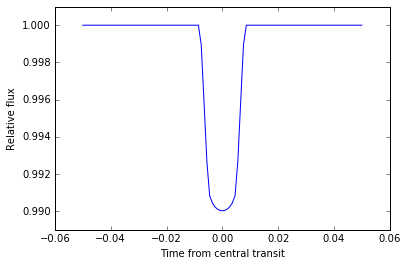

In [1]:
import batman
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 1.                      #orbital period
params.rp = 0.1                      #planet radius (in units of stellar radii)
params.a = 15.                       #semi-major axis (in units of stellar radii)
params.inc = 87.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients
params.limb_dark = "quadratic"       #limb darkening model

t = np.linspace(-0.05, 0.05, 100)

m = batman.TransitModel(params, t)    #initializes model
flux = m.light_curve(params)          #calculates light curve

plt.plot(t, flux)
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.ylim((0.989, 1.001))

plt.show()

In [2]:
def chisqa (data, model):
    chi = 0
    
    for i in range(len(data)):
        num = (data[i]-model[i])**2
        denom = model[i]
        summ = num/denom
        chi = chi + summ
    chisum = np.sum(chi)
    return chisum
    

In [3]:
plt.scatter(times, simulateddata)

data = np.array([times, simulateddata])

# generate some model
params.t0 = 0.0
model = m.light_curve(params)
plt.plot(times, model, color='orange', linewidth=3)

theory = np.array([times, model])

NameError: name 'times' is not defined

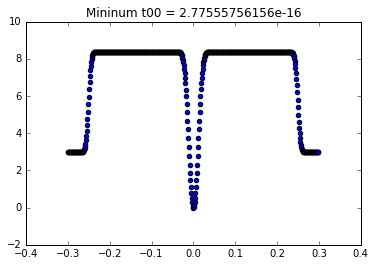

In [4]:
from simulate import simulate
times, noise = simulate()
m = batman.TransitModel(params, times)

# generate simulated data!
params.rp = 1.0
flux = m.light_curve(params)
simulateddata = flux*noise

plotting = False


t00 = np.arange(-0.3, 0.3, 0.001)
chiSq = np.array([])
for i in t00:

    # set the model t0 to one value of t00
    params.t0 = i
    modelflux = m.light_curve(params)
    chiSq = np.append(chiSq, chisqa(simulateddata, modelflux))

    if plotting:
        plt.plot(times, modelflux, color='orange', linewidth=3)
        plt.scatter(times, simulateddata)
        plt.title("t0 = {}, chi^2 = {}".format(i, chiSq[-1]))
        plt.show()
plt.scatter(t00, chiSq)
mint00 = t00[np.argmin(chiSq)]
#print chiSq
plt.title("Mininum t00 = {}".format(mint00))

In [5]:
import astropy.io.ascii
table = astropy.io.ascii.read('kepler1b.txt')
time = table['time']
flux = table['flux']
uncertainty = table['uncertainty']

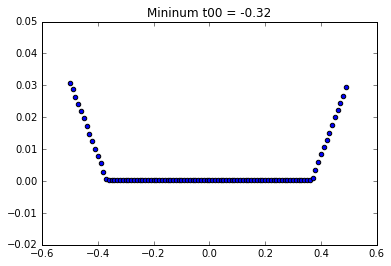

In [8]:
params = batman.TransitParams()
params.t0 = 0.0                      #time of inferior conjunction
params.per = 2.47061317              #orbital period
params.rp = 0.1281                   #planet radius (in units of stellar radii)
params.a = 0.0367                    #semi-major axis (in units of stellar radii)
params.inc = 83.872                  #orbital inclination (in degrees)
params.ecc = 0.0                     #eccentricity
params.w = 0.0                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients
params.limb_dark = "quadratic"       #limb darkening model

from simulate import simulate
times, noise = simulate()
m = batman.TransitModel(params, times)

# generate simulated data!

flux = m.light_curve(params)
simulateddata = flux*noise

plotting = False


t00 = np.arange(-0.5, 0.5, 0.01)
chiSq = np.array([])
for i in t00:

    # set the model t0 to one value of t00
    params.t0 = i
    modelflux = m.light_curve(params)
    chiSq = np.append(chiSq, chisqa(simulateddata, modelflux))

    if plotting:
        plt.plot(times, modelflux, color='orange', linewidth=3)
        plt.scatter(times, simulateddata)
        plt.title("t0 = {}, chi^2 = {}".format(i, chiSq[-1]))
        plt.show()
plt.scatter(t00, chiSq)
mint00 = t00[np.argmin(chiSq)]
#print chiSq
plt.title("Mininum t00 = {}".format(mint00))